# Ensemble Techniques

# Ensemble = 1 . Bagging = Random Forest 

### i.e multiple decesion trees are created randomly 

2. Boosting - Gradient boost , XGboost ==== Correcctive models are added sequentially

In [17]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 = Data Ingestion

In [18]:
import pandas as pd

In [19]:
df= pd.read_csv('train_loan.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Step 2 = Data Quality Check

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [21]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

### Target = Load status where 0 means loan rejected and 1 means accepted

In [23]:
df.shape

(58645, 13)

In [24]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# STEP 3 = sep x and y ( loan status)

In [26]:
x = df.drop(columns=["id","loan_status"])
y = df[["loan_status"]]

In [27]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [28]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [29]:
y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

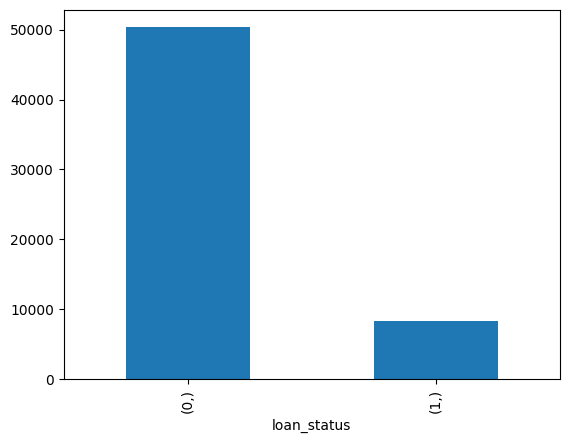

In [32]:
y.value_counts().plot(kind="bar")

# Step 4 = perform preprocessing on x

In [34]:
x.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [35]:

cat = list(x.columns[x.dtypes==object])
con = list(x.columns[x.dtypes!=object])

In [36]:
cat


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [37]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [40]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [41]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)

In [42]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [43]:
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [44]:
pre = ColumnTransformer(
    [

    ("num",num_pipe,con),
    ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [45]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [46]:
x_pre = pre.fit_transform(x)

In [47]:
x_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# step 5 = train test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [51]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [53]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [56]:
xtrain.shape

(46916, 22)

In [59]:
ytrain.shape

(46916, 1)

In [60]:
xtest.shape

(11729, 22)

In [61]:
ytest.shape

(11729, 1)

# step 6 = model building and tuning

In [64]:
from sklearn.ensemble import RandomForestClassifier

model1  = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=1,
    criterion='gini'
)

model1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=1, min_samples_split=5, n_estimators=1)

In [67]:
model1.score(xtrain,ytrain)

0.8735399437292182

In [68]:
model1.score(xtest,ytest)

0.8742433285020036

In [69]:
from sklearn.metrics import f1_score

In [71]:
ypred_test = model1.predict(xtest)
f1_test = f1_score(ytest,ypred_test,average='macro')

In [73]:
f1_test

0.6869762873108156

# tuning the model
### using Randomized Search CV


In [79]:
params = {
      "n_estimators" : [50 ,100 ,200 , 300],
    "max_depth" : [3,4,5,6,7],
    "min_samples_split":[5,6,7,8] ,
    "min_samples_leaf" : [1,3,5]
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

base_rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(base_rf,param_distributions=params,scoring="f1_macro",cv=5,n_jobs=-1)

In [83]:
rscv_rf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1_macro')

In [84]:
rscv_rf.score(xtrain,ytrain)

0.8654805689704683

In [85]:
rscv_rf.score(xtest,ytest)


0.8641475434893853

In [86]:
best_rf = rscv_rf.best_estimator_

In [87]:
best_rf

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=6)

In [88]:
best_rf.score(xtrain,ytrain)

0.9430258334043823

In [89]:
best_rf.score(xtest,ytest)

0.9427913718134538

In [90]:
ypred_test_rf = best_rf.predict(xtest)

In [93]:

ypred_test_rf[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [94]:
f1_rf = f1_score(ytest,ypred_test_rf,average="macro")

In [95]:
f1_rf

0.8641475434893853

# 2 . Gradient boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
model2 = GradientBoostingClassifier(
    learning_rate=0.001,
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=1,
    )

In [101]:
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=1,
                           min_samples_split=5, n_estimators=1)

In [102]:
model2.score(xtrain,ytrain)

0.8570210589138034

In [103]:
model2.score(xtest,ytest)

0.8600051155256203

In [104]:
ypred_test2 = model2.predict(xtest)
ypred_test2[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
ytest.head(10)

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0
17557,1
906,0
43624,0
29017,1
32662,0


In [107]:
f1_2 = f1_score(ytest,ypred_test2,average="macro")
f1_2

0.4623670700403374

In [108]:
params_2 = {
    "learning_rate" : [ 0.1 , 0.2] ,
    "n_estimators":[100,200],
    "max_depth" : [3,4,5]
}

In [111]:
base_gb = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(base_gb,param_distributions=params_2,cv=5,scoring="f1_macro",n_jobs=-1)

rscv_gb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200]},
                   scoring='f1_macro')

In [115]:
rscv_gb.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [116]:
rscv_gb.best_score_

np.float64(0.8913010994486192)

In [117]:
best_gb=rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [118]:
best_gb.score(xtrain,ytrain)

0.9607596555546082

In [119]:
best_gb.score(xtest,ytest)

0.9525961292522807

In [120]:
ypred_test_gb = best_gb.predict(xtest)
ypred_test_gb[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [121]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [122]:
f1_gb = f1_score(ytest,ypred_test_gb,average="macro")
f1_gb

0.8935627966905926

# XGboost = extreme Gradient Boosting


In [123]:
%pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 11.3 MB/s eta 0:00:14
    --------------------------------------- 2.9/150.0 MB 7.6 MB/s eta 0:00:20
   - -------------------------------------- 4.2/150.0 MB 7.2 MB/s eta 0:00:21
   - -------------------------------------- 5.5/150.0 MB 6.9 MB/s eta 0:00:22
   - -------------------------------------- 6.8/150.0 MB 6.8 MB/s eta 0:00:22
   -- ------------------------------------- 8.1/150.0 MB 6.7 MB/s eta 0:00:22
   -- ------------------------------------- 9.4/150.0 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 10.7/150.0 MB 6.6 MB/s eta 0:00:22
   --- ------------------------------------ 12.1/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 13.4/150.0 MB 6.6 MB/s eta 0:00:21
   --- ------------------------------------ 14.7/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 16.0/150.0 MB 6.5 MB/

In [124]:
from xgboost import XGBClassifier

In [132]:
model_xgb = XGBClassifier(
    max_depth = 4,
    n_estimators=200
)

model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [133]:
model_xgb.score(xtrain,ytrain)

0.960482564583511

In [134]:
model_xgb.score(xtest,ytest)

0.9513172478472163

In [135]:
ypred_test_xgb = model_xgb.predict(xtest)
ypred_test_xgb[0:5]

array([0, 0, 0, 0, 0])

In [136]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [137]:
f1_xgb = f1_score(ytest,ypred_test_xgb,average="macro")


In [138]:
f1_xgb

0.8910946744200616

In [139]:
from sklearn.model_selection import cross_val_score

f1_cv_xgb = cross_val_score(model_xgb,xtrain,ytrain,cv=5,scoring="f1_macro")
f1_cv_xgb

array([0.88597713, 0.88296776, 0.89689276, 0.89146881, 0.88597535])

In [140]:
f1_cv_xgb.mean()

np.float64(0.8886563608615458)

# SO GRADIENT BOOST IS THE BEST MODEL 

## OUt of sample prediction

# Step 7 = perform evaluation on selected model

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay

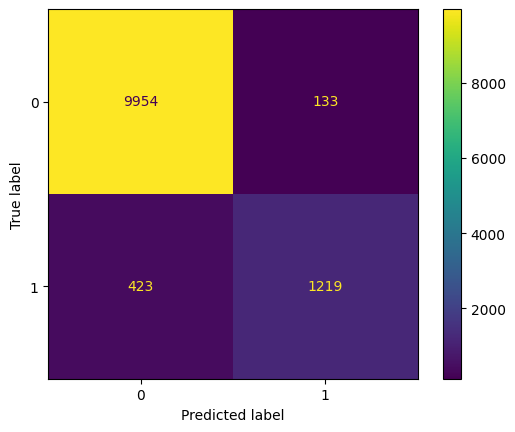

In [146]:
ConfusionMatrixDisplay.from_estimator(best_gb,xtest,ytest)

In [147]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred_test_gb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



## Because F1 macro is > 80% hence model is good for out of sample prediction

### show feature importances

In [151]:
best_gb.feature_importances_


array([1.03051098e-02, 7.75181677e-02, 4.12583170e-02, 9.62033427e-03,
       1.20847581e-01, 3.20126935e-01, 3.41634771e-03, 9.55263886e-04,
       1.03822251e-02, 1.64286108e-01, 8.80239800e-03, 2.08657152e-02,
       2.40042929e-02, 1.20951603e-02, 9.80827596e-03, 9.65812070e-04,
       1.55335100e-02, 1.41429124e-01, 6.56861645e-03, 1.37642115e-04,
       6.87193926e-05, 1.00434432e-03])

In [152]:
xtrain.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [153]:
imp = pd.Series(best_gb.feature_importances_,index=xtrain.columns)

In [154]:
imp

num__person_age                     0.010305
num__person_income                  0.077518
num__person_emp_length              0.041258
num__loan_amnt                      0.009620
num__loan_int_rate                  0.120848
num__loan_percent_income            0.320127
num__cb_person_cred_hist_length     0.003416
cat__person_home_ownership_OTHER    0.000955
cat__person_home_ownership_OWN      0.010382
cat__person_home_ownership_RENT     0.164286
cat__loan_intent_EDUCATION          0.008802
cat__loan_intent_HOMEIMPROVEMENT    0.020866
cat__loan_intent_MEDICAL            0.024004
cat__loan_intent_PERSONAL           0.012095
cat__loan_intent_VENTURE            0.009808
cat__loan_grade_B                   0.000966
cat__loan_grade_C                   0.015534
cat__loan_grade_D                   0.141429
cat__loan_grade_E                   0.006569
cat__loan_grade_F                   0.000138
cat__loan_grade_G                   0.000069
cat__cb_person_default_on_file_Y    0.001004
dtype: flo

<Axes: >

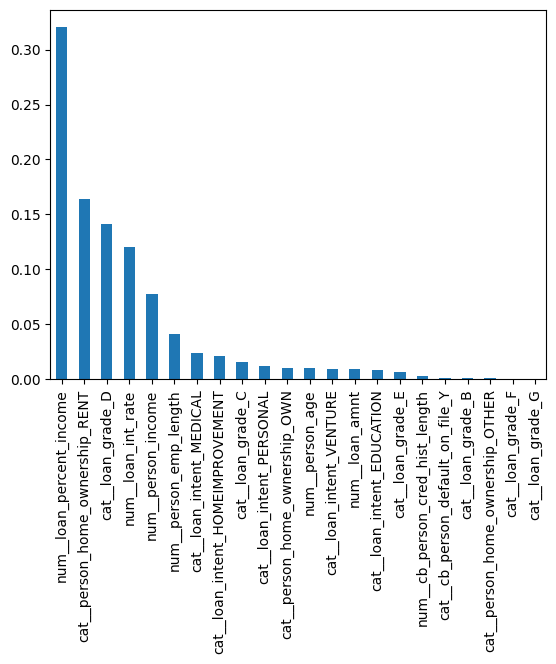

In [157]:
imp.sort_values(ascending=False).plot(kind="bar")

In [158]:
imp.sort_values(ascending=False)

num__loan_percent_income            0.320127
cat__person_home_ownership_RENT     0.164286
cat__loan_grade_D                   0.141429
num__loan_int_rate                  0.120848
num__person_income                  0.077518
num__person_emp_length              0.041258
cat__loan_intent_MEDICAL            0.024004
cat__loan_intent_HOMEIMPROVEMENT    0.020866
cat__loan_grade_C                   0.015534
cat__loan_intent_PERSONAL           0.012095
cat__person_home_ownership_OWN      0.010382
num__person_age                     0.010305
cat__loan_intent_VENTURE            0.009808
num__loan_amnt                      0.009620
cat__loan_intent_EDUCATION          0.008802
cat__loan_grade_E                   0.006569
num__cb_person_cred_hist_length     0.003416
cat__cb_person_default_on_file_Y    0.001004
cat__loan_grade_B                   0.000966
cat__person_home_ownership_OTHER    0.000955
cat__loan_grade_F                   0.000138
cat__loan_grade_G                   0.000069
dtype: flo

# out of sample prediction

In [160]:
xnew = pd.read_csv("test_loan.csv")

In [161]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [162]:
xnew.shape

(39098, 12)

In [163]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [164]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [165]:
predictions = best_gb.predict(xnew_pre)

In [166]:
predictions

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [172]:
probs = best_gb.predict_proba(xnew_pre)[:,1]

In [173]:
probs

array([0.99807173, 0.02517183, 0.60690316, ..., 0.01302843, 0.12416626,
       0.95480795], shape=(39098,))

In [171]:
best_gb.classes_

array([0, 1])

In [174]:
result = xnew[['id']]
result

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [175]:
result["loan_status"] = predictions
result["prob"] = probs

In [177]:
result

,id,loan_status,prob
0,58645,1,0.998072
1,58646,0,0.025172
2,58647,1,0.606903
3,58648,0,0.010264
4,58649,0,0.074483
...,...,...,...
39093,97738,0,0.063373
39094,97739,0,0.008190
39095,97740,0,0.013028
39096,97741,0,0.124166


In [178]:
result = result.round(4)
result

,id,loan_status,prob
0,58645,1,0.9981
1,58646,0,0.0252
2,58647,1,0.6069
3,58648,0,0.0103
4,58649,0,0.0745
...,...,...,...
39093,97738,0,0.0634
39094,97739,0,0.0082
39095,97740,0,0.0130
39096,97741,0,0.1242


In [179]:
result["loan_status"].value_counts()

loan_status
0    34779
1     4319
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

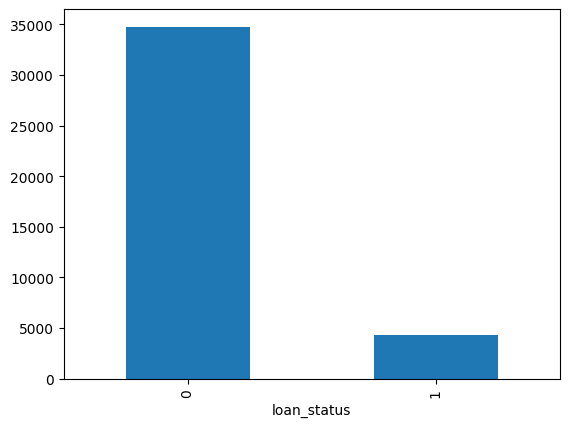

In [180]:
result["loan_status"].value_counts().plot(kind="bar")

In [181]:
result.to_csv("results.csv",index=False)

# save model and preprocessor

In [183]:
import joblib

In [184]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [185]:
best_gb

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [186]:
joblib.dump(best_gb,"loan_model.joblib")


['loan_model.joblib']

In [187]:
joblib.dump(pre,"loan_pre.joblib")

['loan_pre.joblib']

# loading the model again

In [189]:
p = joblib.load("loan_pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [190]:
q = joblib.load("loan_model.joblib")
q

GradientBoostingClassifier(max_depth=5, n_estimators=200)